In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline
import math
import plotly.express as px
import plotly.offline as pyo
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.dates as mdates

In [ ]:
virus_data = pd.read_csv('covid_19_india.csv')

In [ ]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')

In [ ]:
confirm = confirmed_cases.groupby('Country/Region').sum().reset_index()
death = deaths_cases.groupby('Country/Region').sum().reset_index()
recover = recovered_cases.groupby('Country/Region').sum().reset_index()

In [ ]:
dates = list(confirmed_cases.columns[4:])
dates = list(pd.to_datetime(dates))            #22jan2020
dates_india = dates[8:]                        #30jan2020

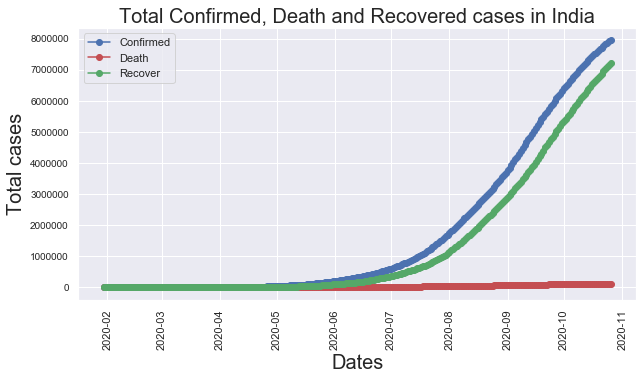

In [ ]:
k1 = confirm[confirm['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k1.values.tolist()[0] 
k2 = death[death['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k2.values.tolist()[0] 
k3 = recover[recover['Country/Region']=='India'].loc[:,'1/30/20':]
india_recover = k3.values.tolist()[0] 

plt.figure(figsize= (10,5))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Death and Recovered cases in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = "Confirmed",linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_deaths,x= dates_india,label = "Death",linestyle ='-',color = 'r')
ax3 = plt.plot_date(y= india_recover,x= dates_india,label = "Recover",linestyle ='-',color = 'g')

plt.legend();

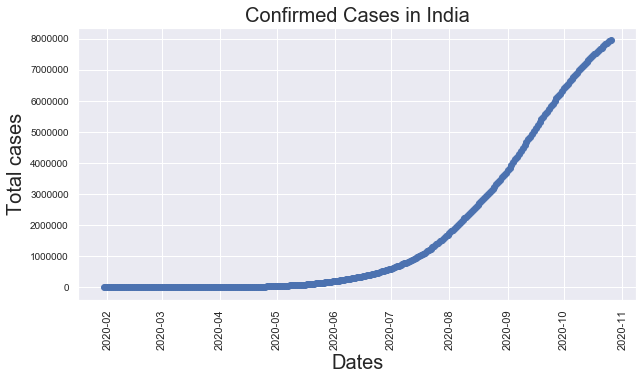

In [ ]:
k1 = confirm[confirm['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k1.values.tolist()[0] 

plt.figure(figsize= (10,5))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Confirmed Cases in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = "Confirmed",linestyle ='-',color = 'b')

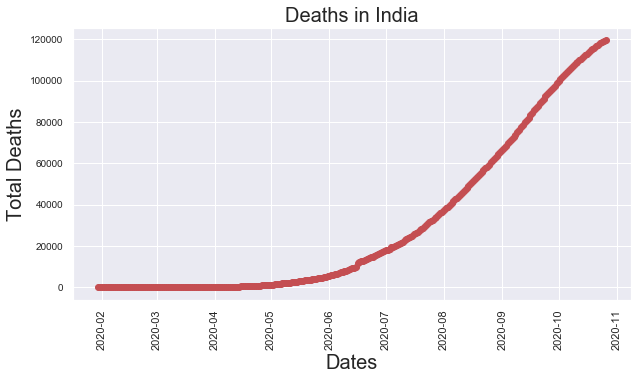

In [ ]:
k2 = death[death['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k2.values.tolist()[0] 

plt.figure(figsize= (10,5))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total Deaths',fontsize = 20)
plt.title("Deaths in India" , fontsize = 20)

ax2 = plt.plot_date(y= india_deaths,x= dates_india,label = "Death",linestyle ='-',color = 'r')

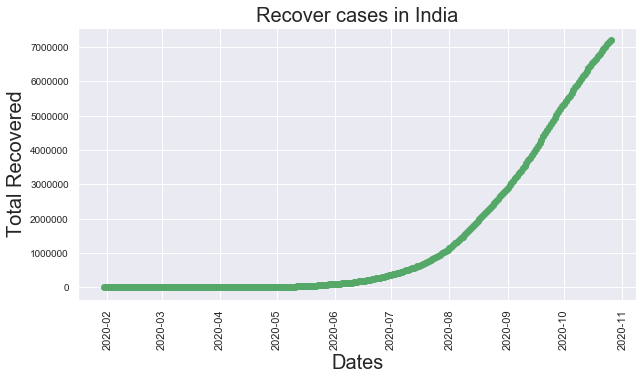

In [ ]:
k3 = recover[recover['Country/Region']=='India'].loc[:,'1/30/20':]
india_recover = k3.values.tolist()[0] 

plt.figure(figsize= (10,5))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total Recovered',fontsize = 20)
plt.title("Recover cases in India" , fontsize = 20)

ax3 = plt.plot_date(y= india_recover,x= dates_india,label = "Recover",linestyle ='-',color = 'g')

In [ ]:
#data cleaning of covid_19_india.csv (virus_data)
virus_data.head()

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  01/02/20  6:00 PM               Kerala                       2   
3    4  02/02/20  6:00 PM               Kerala                       3   
4    5  03/02/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [ ]:
virus_data.rename(columns={'State/UnionTerritory':'State','Cured':'Recovered'},inplace=True)

In [ ]:
virus_data['State'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***'], dtype=object)

In [ ]:
virus_data['State'] = virus_data['State'].replace({'Unassigned':'Other','Cases being reassigned to states':'Other',})

In [ ]:
#converting confirmed,deaths,ConfirmedIndianNational and ConfirmedForeignNational to int from string
virus_data['Confirmed'] = pd.to_numeric(virus_data['Confirmed'], errors='coerce')
virus_data['Confirmed']=virus_data['Confirmed'].fillna(0)      
virus_data['Confirmed']=virus_data['Confirmed'].astype('int')

virus_data['Deaths'] = pd.to_numeric(virus_data['Deaths'], errors='coerce')
virus_data['Deaths']=virus_data['Deaths'].fillna(0)
virus_data['Deaths']=virus_data['Deaths'].astype('int')

virus_data['Recovered'] = pd.to_numeric(virus_data['Recovered'], errors='coerce')
virus_data['Recovered']=virus_data['Recovered'].fillna(0)
virus_data['Recovered']=virus_data['Recovered'].astype('int')

virus_data['ConfirmedIndianNational']= virus_data['ConfirmedIndianNational'].replace("-", 0)
virus_data['ConfirmedIndianNational']=virus_data['ConfirmedIndianNational'].astype('int')

virus_data['ConfirmedForeignNational']= virus_data['ConfirmedForeignNational'].replace("-", 0)
virus_data['ConfirmedForeignNational']=virus_data['ConfirmedForeignNational'].astype('int')

In [ ]:
#Cleaning up mixed date formats in Date column

# new data frame with split value columns 
new = virus_data["Date"].str.split("/", n = 2, expand = True) 
  
# making separate first name column from new data frame 
virus_data["Day"]= new[0] 
virus_data['Day']=virus_data['Day'].astype('int') 
# making separate last name column from new data frame 
virus_data["Month"]= new[1]
virus_data['Month']=virus_data['Month'].astype('int') 
# making separate last name column from new data frame 
virus_data["Year"]= 2020
virus_data.tail()

Sno      Date     Time          State  ConfirmedIndianNational  \
7081  7082  07/10/20  8:00 AM      Telengana                        0   
7082  7083  07/10/20  8:00 AM        Tripura                        0   
7083  7084  07/10/20  8:00 AM    Uttarakhand                        0   
7084  7085  07/10/20  8:00 AM  Uttar Pradesh                        0   
7085  7086  07/10/20  8:00 AM    West Bengal                        0   

      ConfirmedForeignNational  Recovered  Deaths  Confirmed  Day  Month  Year  
7081                         0     177008    1189     204748    7     10  2020  
7082                         0      22623     301      27545    7     10  2020  
7083                         0      43238     677      52329    7     10  2020  
7084                         0     370753    6153     420937    7     10  2020  
7085                         0     243743    5318     277049    7     10  2020

In [ ]:
#dropping original date column and year,month & date column also
#creating a new cleaned date column
virus_data = virus_data.drop(['Date'],axis = 1)
virus_data['Date'] = virus_data['Year'].map(str) + '-' + virus_data['Month'].map(str) + '-' + virus_data['Day'].map(str)
#virus_data = virus_data.drop(['Year','Month','Day'],axis = 1) 

In [ ]:
# Changing data types to datetime format
virus_data["Date"]=pd.to_datetime(virus_data["Date"],format='%Y%m%d', errors='ignore')
virus_data["Time"]=pd.to_datetime(virus_data["Time"], format='%H%M', errors='ignore')

In [ ]:
latlong = pd.read_csv('India latitudes and longitudes.csv')

In [ ]:
final = virus_data.merge(latlong)

In [ ]:
final

Sno     Time      State  ConfirmedIndianNational  \
0        1  6:00 PM     Kerala                        1   
1        2  6:00 PM     Kerala                        1   
2        3  6:00 PM     Kerala                        2   
3        4  6:00 PM     Kerala                        3   
4        5  6:00 PM     Kerala                        3   
...    ...      ...        ...                      ...   
6805  4387  8:00 AM  Telangana                        0   
6806  4422  8:00 AM  Telangana                        0   
6807  4457  8:00 AM  Telangana                        0   
6808  4492  8:00 AM  Telangana                        0   
6809  4562  8:00 AM  Telangana                        0   

      ConfirmedForeignNational  Recovered  Deaths  Confirmed  Day  Month  \
0                            0          0       0          1   30      1   
1                            0          0       0          1   31      1   
2                            0          0       0          2    1      2   
3                            0          0       0          3    2      2   
4                            0          0       0          3    3      2   
...                        ...        ...     ...        ...  ...    ...   
6805                         0      37385     429      47705   22      7   
6806                         0      37666     438      49259   23      7   
6807                         0      39327     447      50826   24      7   
6808                         0      40334     455      52466   25      7   
6809                         0      41332     463      54059   27      7   

      Year       Date   Latitude  Longitude  
0     2020  2020-1-30   8.900373  76.569993  
1     2020  2020-1-31   8.900373  76.569993  
2     2020   2020-2-1   8.900373  76.569993  
3     2020   2020-2-2   8.900373  76.569993  
4     2020   2020-2-3   8.900373  76.569993  
...    ...        ...        ...        ...  
6805  2020  2020-7-22  17.366000  78.475000  
6806  2020  2020-7-23  17.366000  78.475000  
6807  2020  2020-7-24  17.366000  78.475000  
6808  2020  2020-7-25  17.366000  78.475000  
6809  2020  2020-7-27  17.366000  78.475000  

[6810 rows x 14 columns]

In [ ]:
plt.figure(figsize = (18,10))
figure = px.line(final, x='Date', y='Confirmed', color='State')
figure.update_xaxes(rangeslider_visible=True)
pyo.iplot(figure)

<Figure size 1296x720 with 0 Axes>

In [ ]:
plt.figure(figsize = (18,10))
figure = px.line(final, x='Date', y='Deaths', color='State')
figure.update_xaxes(rangeslider_visible=True)
pyo.iplot(figure)

<Figure size 1296x720 with 0 Axes>

In [ ]:
plt.figure(figsize = (18,10))
figure = px.line(final, x='Date', y='Recovered', color='State')
figure.update_xaxes(rangeslider_visible=True)
pyo.iplot(figure)

<Figure size 1296x720 with 0 Axes>

In [ ]:
#dataset of latest records of oct 07
covid_latest  = final[final['Date']=='2020-10-7']
covid_latest.head()

Sno     Time          State  ConfirmedIndianNational  \
251   7068  8:00 AM         Kerala                        0   
471   7060  8:00 AM          Delhi                        0   
690   7079  8:00 AM      Rajasthan                        0   
908   7085  8:00 AM  Uttar Pradesh                        0   
1126  7063  8:00 AM        Haryana                        0   

      ConfirmedForeignNational  Recovered  Deaths  Confirmed  Day  Month  \
251                          0     154092     884     242799    7     10   
471                          0     266935    5581     295236    7     10   
690                          0     125448    1574     148316    7     10   
908                          0     370753    6153     420937    7     10   
1126                         0     123286    1509     136115    7     10   

      Year       Date   Latitude  Longitude  
251   2020  2020-10-7   8.900373  76.569993  
471   2020  2020-10-7  28.669993  77.230004  
690   2020  2020-10-7  26.449999  74.639981  
908   2020  2020-10-7  27.599981  78.050006  
1126  2020  2020-10-7  28.450006  77.019991

In [ ]:
totalconfirm = covid_latest['Confirmed'].sum()
totaldeath = covid_latest['Deaths'].sum()
totalrecover = covid_latest['Recovered'].sum()

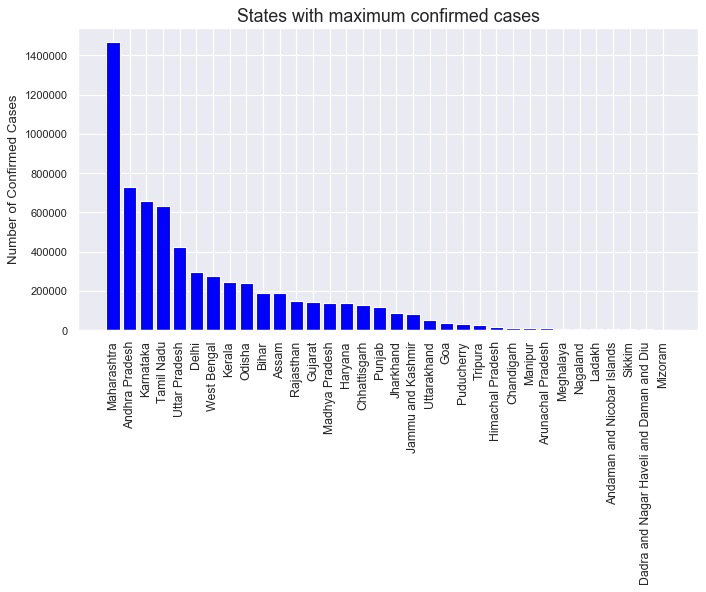

In [ ]:
covid_latest = covid_latest.sort_values(by=['Confirmed'], ascending = False)
plt.figure(figsize=(10,5), dpi=80)
plt.bar(covid_latest['State'], covid_latest['Confirmed'],
        align='center',color='blue')
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('States with maximum confirmed cases', size = 16)
plt.show()

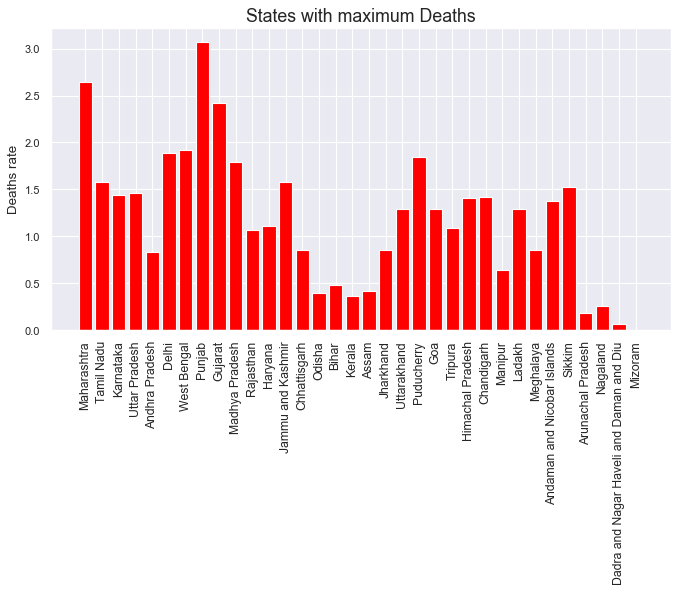

In [ ]:

covid_latest = covid_latest.sort_values(by=['Deaths'], ascending = False)
covid_latest['Deathrate'] = covid_latest['Deaths']*100/covid_latest['Confirmed']
plt.figure(figsize=(10,5), dpi=80)
plt.bar(covid_latest['State'], covid_latest['Deathrate'],
        align='center',color='red')
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.ylabel('Deaths rate', size = 12)
plt.title('States with maximum Deaths', size = 16)
plt.show()

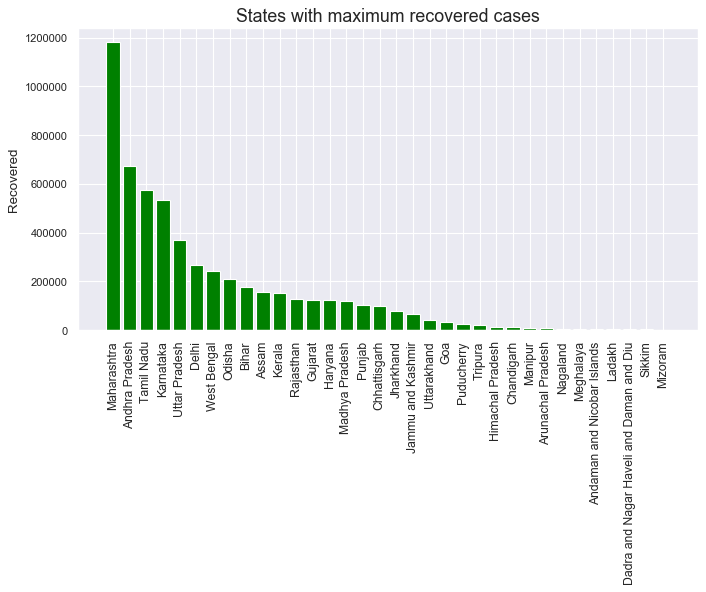

In [ ]:
covid_latest = covid_latest.sort_values(by=['Recovered'], ascending = False)
plt.figure(figsize=(10,5), dpi=80)
plt.bar(covid_latest['State'], covid_latest['Recovered'],
        align='center',color='green')
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.ylabel('Recovered', size = 12)
plt.title('States with maximum recovered cases', size = 16)
plt.show()

In [ ]:
otherconfirm = covid_latest[covid_latest['Confirmed']<=52329]['Confirmed'].sum()
otherdeath = covid_latest[covid_latest['Deaths']<=677]['Deaths'].sum()
otherrecover = covid_latest[covid_latest['Recovered']<=43238]['Recovered'].sum()

In [ ]:
state_confirm = covid_latest[covid_latest['Confirmed']>52329]

In [ ]:
#dataframe for pie chart
pieframe = [{'State':'Other','Confirmed':otherconfirm,'Recovered':otherrecover,'Deaths':otherdeath}]  #ignore this
pie = state_confirm.append(pieframe).reset_index()
#s = (round((((pie['Confirmed'])/(totalconfirm))*100),2))
#pie['State'] = pie['State']
#pie['Confirmed cases Percentage']=s
pie.head()

index     Sno     Time           State  ConfirmedIndianNational  \
0   1982  7071.0  8:00 AM     Maharashtra                      0.0   
1   2618  7053.0  8:00 AM  Andhra Pradesh                      0.0   
2   1556  7081.0  8:00 AM      Tamil Nadu                      0.0   
3   1769  7067.0  8:00 AM       Karnataka                      0.0   
4    908  7085.0  8:00 AM   Uttar Pradesh                      0.0   

   ConfirmedForeignNational  Recovered  Deaths  Confirmed  Day  Month    Year  \
0                       0.0    1179726   38717    1465911  7.0   10.0  2020.0   
1                       0.0     672479    6052     729307  7.0   10.0  2020.0   
2                       0.0     575212    9917     630408  7.0   10.0  2020.0   
3                       0.0     533074    9461     657705  7.0   10.0  2020.0   
4                       0.0     370753    6153     420937  7.0   10.0  2020.0   

        Date   Latitude  Longitude  
0  2020-10-7  19.250232  73.160175  
1  2020-10-7  15.910429  79.747003  
2  2020-10-7  12.920386  79.150042  
3  2020-10-7  12.570381  76.919997  
4  2020-10-7  27.599981  78.050006

[]

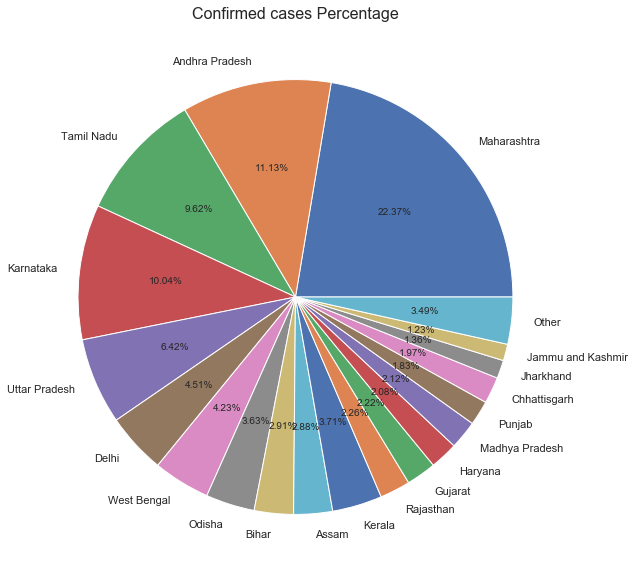

In [ ]:
fig = plt.figure(figsize =(10, 10))
plt.pie(pie['Confirmed'], labels = pie['State'],autopct='%1.2f%%')
plt.title('Confirmed cases Percentage', size = 16)
plt.plot()

[]

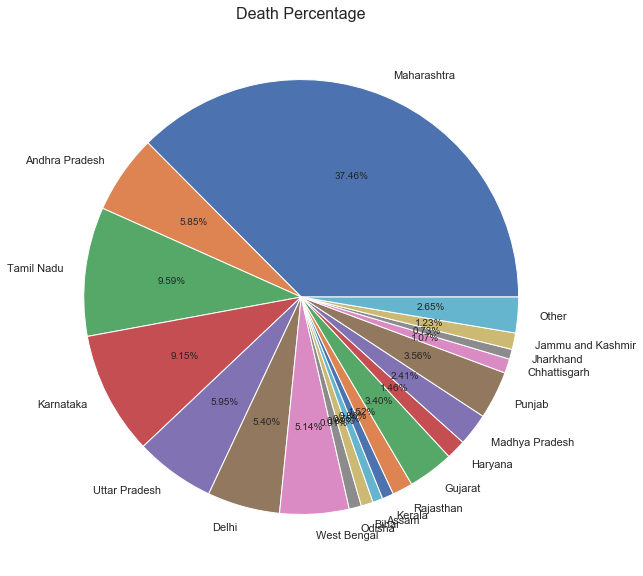

In [ ]:
fig = plt.figure(figsize =(10, 10))
plt.pie(pie['Deaths'], labels = pie['State'],autopct='%1.2f%%')
plt.title('Death Percentage', size = 16)
plt.plot()

[]

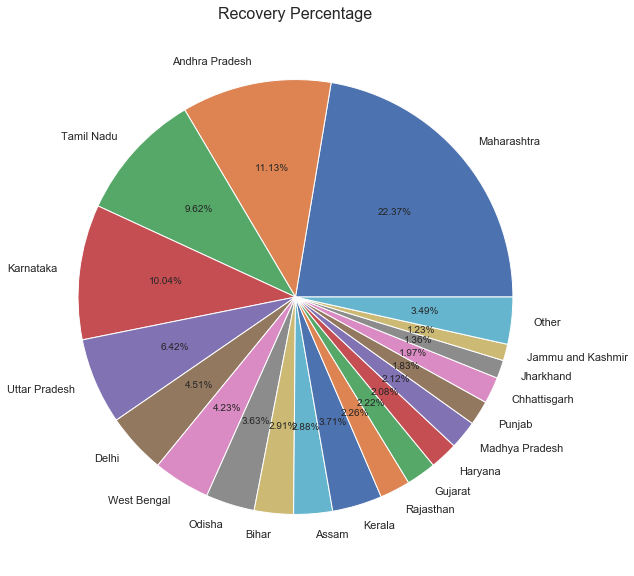

In [ ]:
fig = plt.figure(figsize =(10, 10))
plt.pie(pie['Confirmed'], labels = pie['State'],autopct='%1.2f%%')
plt.title('Recovery Percentage', size = 16)
plt.plot()

In [ ]:
statewise = pd.pivot_table(final, values=['Confirmed','Deaths','Recovered'], index='State', aggfunc='max')
statewise['Active'] = statewise['Confirmed'] - (statewise['Deaths']+statewise['Recovered'])
statewise['Recovery Rate'] = statewise['Recovered']*100 / statewise['Confirmed']
statewise['Death Rate'] = statewise['Deaths']*100 /statewise['Confirmed']

statewise = statewise.sort_values(by='Confirmed', ascending= False)
statewise.style.background_gradient(cmap='YlOrRd')

In [ ]:
all_state = list(final['State'].unique())
#all_state.remove('Unassigned')
latest = final[final['Date'] > '2020-1-10']
state_cases = latest.groupby('State')['Confirmed','Deaths','Recovered'].max().reset_index()
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Recovered'])
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)
states =list(state_cases['State'][0:34])

states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_active = {}
states_dates = {}

for state in states:
    df = latest[latest['State'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Recovered'][i]-df['Recovered'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    states_active[state] = n
    date = list(df['Date'])
    states_dates[state] = date[1:]

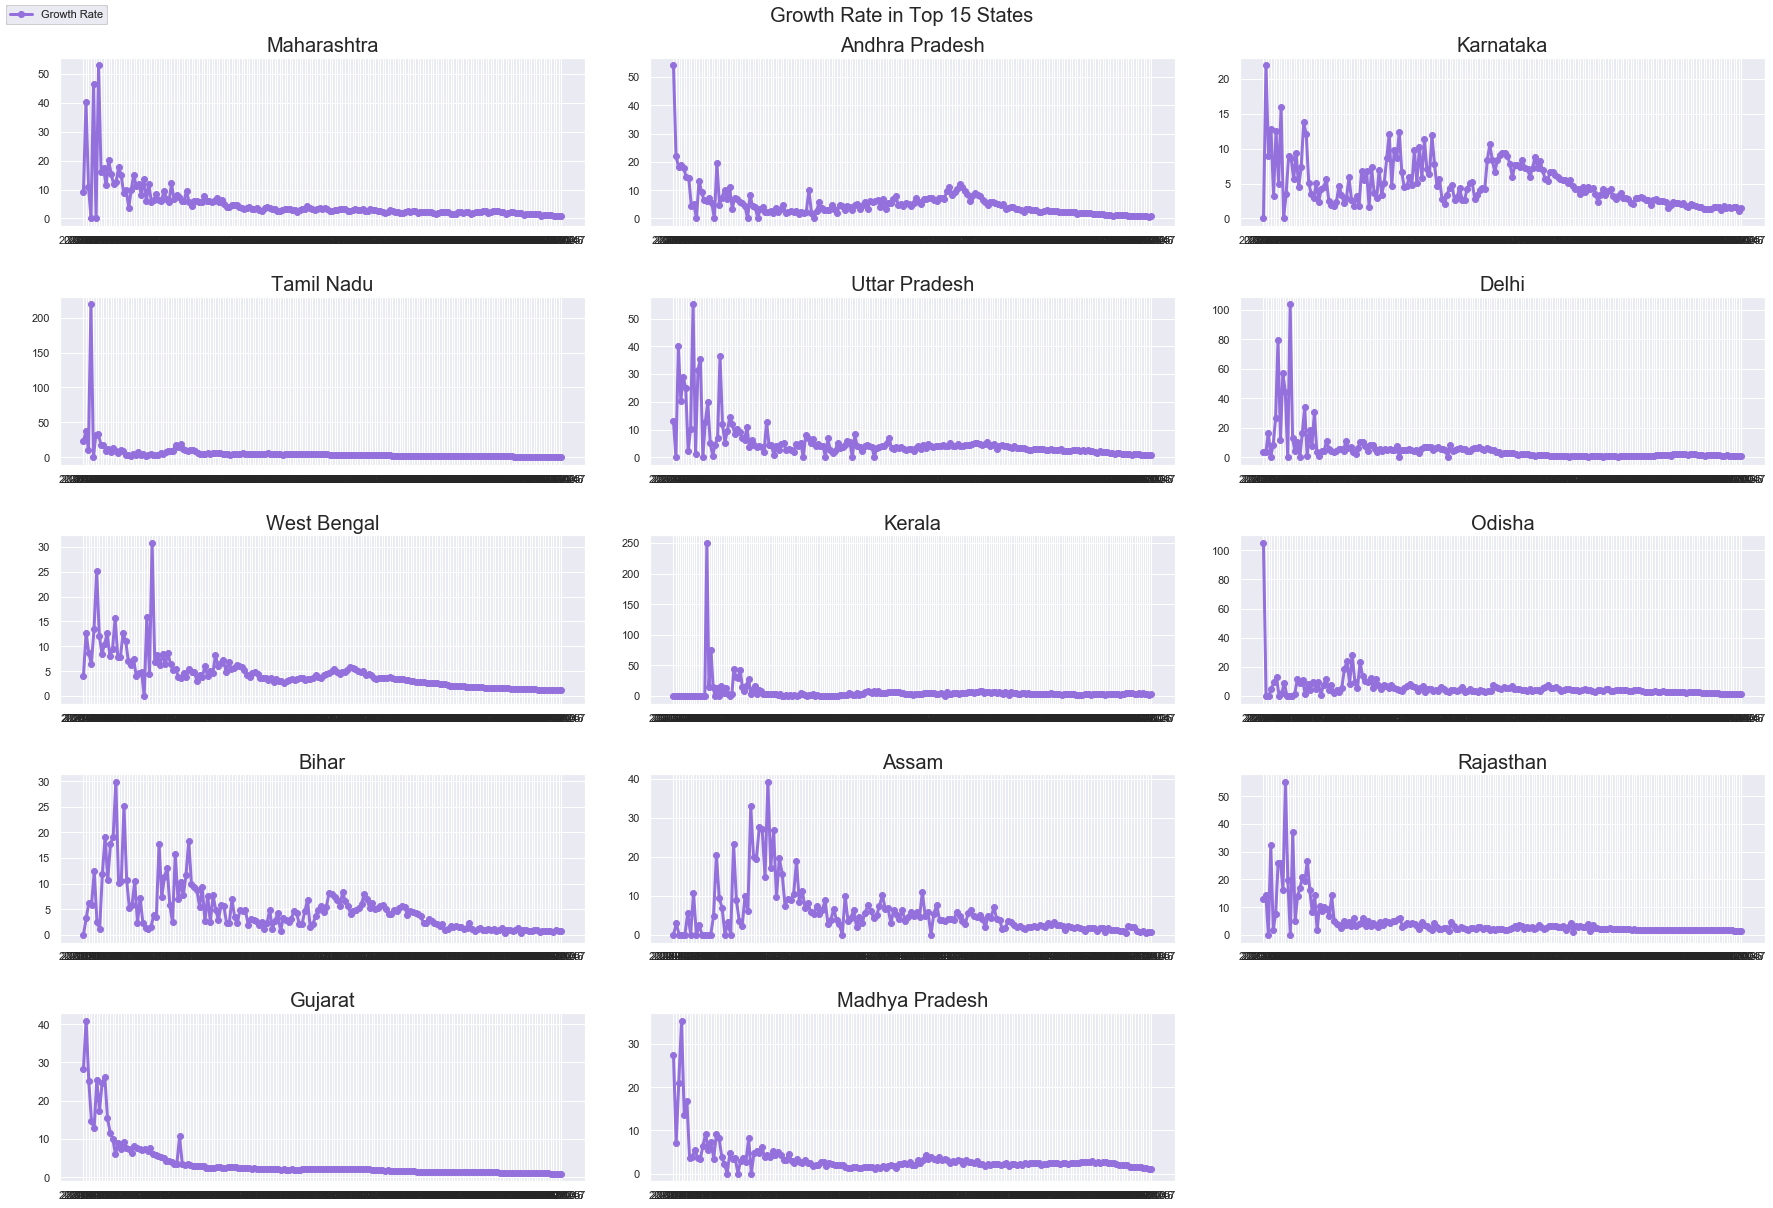

In [ ]:
def calc_growthRate(values):
    k = []
    for i in range(1,len(values)):
        summ = 0
        for j in range(i):
            summ = summ + values[j]
        rate = (values[i]/summ)*100
        k.append((rate))
    return k

fig = plt.figure(figsize= (25,17))
plt.suptitle('Growth Rate in Top 15 States',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    #ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    growth_rate = calc_growthRate(states_confirmed[states[k]])
    plt.plot_date(states_dates[states[k]][21:],growth_rate[20:],color = '#9370db',label = 'Growth Rate',linewidth =3,linestyle='-')  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)